In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = keras.datasets.cifar100.load_data()
print(xtrain.shape , ytrain.shape)
print(xtest.shape , ytest.shape)

# data scaling
xtrain = xtrain/xtrain.max()
xtest = xtest/xtrain.max()

169001437/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
#create the CNN model
cnn_model = keras.models.Sequential()   #empty framework
#convolutional layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(32,32,3)))
#max pooling - 1
cnn_model.add(keras.layers.MaxPooling2D(2,2))

#convolutional layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
#max pooling - 2
cnn_model.add(keras.layers.MaxPooling2D(2,2))

#feed forward network
cnn_model.add(keras.layers.Flatten()) #input
cnn_model.add(keras.layers.Dense(200,activation='relu')) #HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) #HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) #HL3
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) #Output layer

#optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer= 'sgd',loss= loss ,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 50)        4550      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 200)               3

In [92]:
 #train the cnn along with the validation data
 history = cnn_model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
9/9 [==============================] - 0s 32ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2052 - val_accuracy: 0.9333
Epoch 2/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1993 - val_accuracy: 0.9417
Epoch 3/100
9/9 [==============================] - 0s 30ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2017 - val_accuracy: 0.9417
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9417
Epoch 5/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1947 - val_accuracy: 0.9417
Epoch 6/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1997 - val_accuracy: 0.9333
Epoch 7/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1962 - val_accuracy: 0.9500
Epoch 8/100
9/9 [===

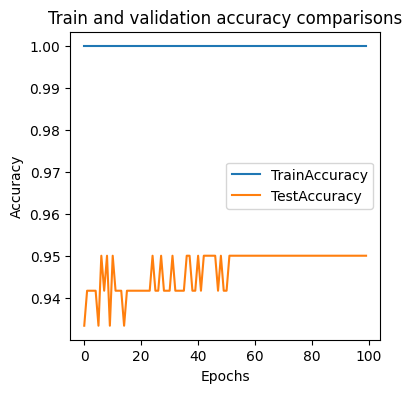

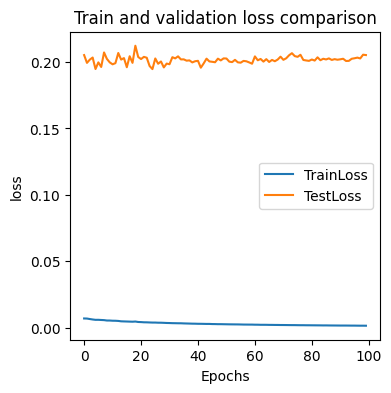

In [93]:
import matplotlib.pyplot as plt

plt.figure(1,(4,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(4,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

# **SVM**

In [1]:
# mounting the google drive
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [4]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Day 10/orl_face.zip' -d '/content/drive/MyDrive/Colab Notebooks/Day 10/orl_face'

Archive:  /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face.zip
   creating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/__MACOSX/
   creating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/__MACOSX/orl_face/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/__MACOSX/orl_face/._.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/u1/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/u1/1.png  
   creating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/__MACOSX/orl_face/u1/
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/__MACOSX/orl_face/u1/._1.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/u1/10.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/

<class 'numpy.ndarray'>
(112, 92)

(112, 92)
(1, 10304)
range: 0.019607844 - 0.90588236


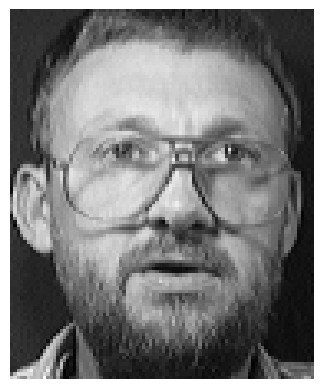

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg

#access any single image
user_name = 14
samp_no = 6

path = "/content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/u%d/%d.png"%(user_name,samp_no)

#read the image
im = mimg.imread(path)

print(type(im))
print(im.shape)

#display the image
plt.imshow(im,cmap='gray')
plt.axis('off')

print()

# convert the 2D-data of image into 1-D features
feat = im.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(im.shape)
print(feat.shape)
print("range:",im.min(),'-',im.max())

In [19]:
# logic to access all the samples of all
# the users
tot_samples = 400
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))
indx=-1
for i in range(1,41,1): # to traverse users
  for j in range(1,11,1): # to traverse samples
    indx = indx+1

    # access any single image
    usr_name = i
    samp_no = j
    path = "/content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/u%d/%d.png"%(usr_name,samp_no)

    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

In [29]:
from sklearn import svm

X = data.copy()
y = label.copy()

#split the data into train and test
r = 0.3

Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    svm_model = svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

print()

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF

(280, 10304) (280,)
(120, 10304) (120,)
[[0.94166667 0.94166667 0.94166667]
 [0.95       0.95       0.95      ]
 [0.88333333 0.95       0.95      ]]



,C=1,C=2,C=3
poly,0.941667,0.941667,0.941667
linear,0.950000,0.950000,0.950000
rbf,0.883333,0.950000,0.950000


# **NEURAL NETWORK**

In [76]:
import numpy as np
data = np.zeros((400,112,92))
label = np.zeros(400)
print(data.shape)
count = 0
for i in range(1,41):
  for j in range(1,11):
    path = "/content/drive/MyDrive/Colab Notebooks/Day 10/orl_face/orl_face/u%d/%d.png"%(i,j)
    im = mimg.imread(path)
    data[count,:,:] = im
    label[count] = i
    count+=1

print(data.shape,label.shape)


(400, 112, 92)
(400, 112, 92) (400,)


In [77]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data,label,test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

face_model = keras.Sequential()
#input layer
face_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2])))

#hidden layers
face_model.add(keras.layers.Dense(128,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(512,activation='relu'))

#output layer
face_model.add(keras.layers.Dense(410,activation='relu'))

#add optimizer
face_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(face_model.summary())

(280, 112, 92) (280,)
(120, 112, 92) (120,)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 10304)             0         
                                                                 
 dense_42 (Dense)            (None, 128)               1319040   
                                                                 
 dense_43 (Dense)            (None, 256)               33024     
                                                                 
 dense_44 (Dense)            (None, 256)               65792     
                                                                 
 dense_45 (Dense)            (None, 512)               131584    
                                                                 
 dense_46 (Dense)            (None, 410)               210330    
                                                                 
Total par

In [79]:
#train the model
history = face_model.fit(xtrain, ytrain, epochs=150)

Epoch 1/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7761 - accuracy: 0.8786
Epoch 2/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7720 - accuracy: 0.8786
Epoch 3/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7726 - accuracy: 0.8786
Epoch 4/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7698 - accuracy: 0.8786
Epoch 5/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7680 - accuracy: 0.8786
Epoch 6/150
9/9 [==============================] - 0s 4ms/step - loss: 0.7696 - accuracy: 0.8786
Epoch 7/150
9/9 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.8786
Epoch 8/150
9/9 [==============================] - 0s 4ms/step - loss: 0.7672 - accuracy: 0.8786
Epoch 9/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7664 - accuracy: 0.8786
Epoch 10/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7657 - accuracy: 0.8786
Epoch 11/150
9/9 [===========

In [80]:
#evaluate the test data

[loss, accNN] = face_model.evaluate(xtest, ytest)
print(f"Testing Accuracy of Neural Network (NN) is: {accNN}")

4/4 [==============================] - 0s 6ms/step - loss: 1.1255 - accuracy: 0.8083
Testing Accuracy of Neural Network (NN) is: 0.8083333373069763


# **CNN**

In [90]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework

# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(400)) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 110, 90, 64)       640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 55, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 53, 43, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 26, 21, 64)        0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 34944)             0         
                                                                 
 dense_59 (Dense)            (None, 200)             

In [91]:
# train the cnn along with the validation data
history = cnn_model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest));

Epoch 1/100
9/9 [==============================] - 3s 93ms/step - loss: 5.9842 - accuracy: 0.0000e+00 - val_loss: 5.9748 - val_accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 24ms/step - loss: 5.9687 - accuracy: 0.0000e+00 - val_loss: 5.9627 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 30ms/step - loss: 5.9516 - accuracy: 0.0000e+00 - val_loss: 5.9430 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 5.9276 - accuracy: 0.0000e+00 - val_loss: 5.9164 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 5.8914 - accuracy: 0.0000e+00 - val_loss: 5.8714 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 5.8242 - accuracy: 0.0000e+00 - val_loss: 5.7859 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 5.6900 - accuracy: 0.0000e+00 - val_loss

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1,(4,4))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(4,4))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()